# Data Preparation and Exploration

In [356]:
import os
import random
from PIL import Image

from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

from src.config import PROCESSED_DATA_DIR, RAW_DATA_DIR
image_path = RAW_DATA_DIR

BATCH_SIZE = 32

In [312]:
def walk_through_directory(directory):
    """Walks through dir_path returning its contents."""
    for dirpath, dirnames, filenames in os.walk(directory):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

In [313]:
walk_through_directory(image_path)

There are 2 directories and 1 images in C:\Git\hamburger-hotdog-pizza-classifier\data\raw
There are 3 directories and 0 images in C:\Git\hamburger-hotdog-pizza-classifier\data\raw\test
There are 0 directories and 250 images in C:\Git\hamburger-hotdog-pizza-classifier\data\raw\test\hamburger
There are 0 directories and 250 images in C:\Git\hamburger-hotdog-pizza-classifier\data\raw\test\hot_dog
There are 0 directories and 250 images in C:\Git\hamburger-hotdog-pizza-classifier\data\raw\test\pizza
There are 3 directories and 0 images in C:\Git\hamburger-hotdog-pizza-classifier\data\raw\train
There are 0 directories and 750 images in C:\Git\hamburger-hotdog-pizza-classifier\data\raw\train\hamburger
There are 0 directories and 750 images in C:\Git\hamburger-hotdog-pizza-classifier\data\raw\train\hot_dog
There are 0 directories and 750 images in C:\Git\hamburger-hotdog-pizza-classifier\data\raw\train\pizza


In [314]:
# Setup train and testing paths
train_dir = image_path / 'train'
test_dir = image_path / 'test'
test_dir, train_dir

(WindowsPath('C:/Git/hamburger-hotdog-pizza-classifier/data/raw/test'),
 WindowsPath('C:/Git/hamburger-hotdog-pizza-classifier/data/raw/train'))

## Step 2: Visualize Image

Let's write some code to:
1. Get all the image paths
2. Pick a random image path using Python's random.choice()
3. Get the image class name using `pathlib.Path.parent.stem`
4. Since we're working with images, let's open the image with Python's PIL
5. We'll then show the image and print metadata

Random image path: C:\Git\hamburger-hotdog-pizza-classifier\data\raw\test\hot_dog\3077614.jpg
Image class: hot_dog
Image size: (512, 512)


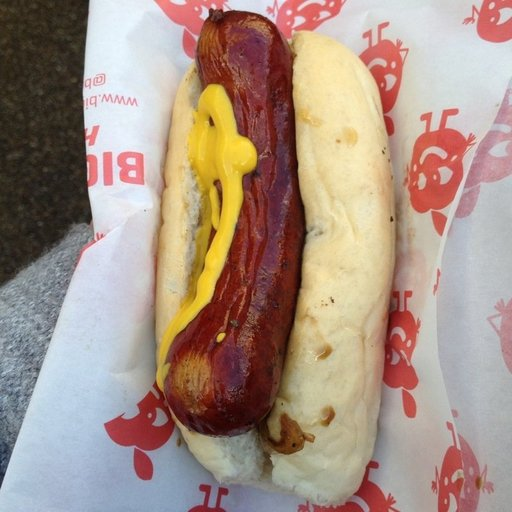

In [315]:
# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Randomly select a random image from the image path 
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name
image_class = random_image_path.parent.stem

#4. Open image
img = Image.open(random_image_path)

#5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image size: {img.size}")
img

## 3. Transforming Data

Before we can use our image data with PyTorch:
1. Turn your target data into tensors (in our case, numerical representation of our images).
2. Turn it into a `torch.utils.data.Dataset`

In [323]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
])

In [324]:
transform(img).shape

torch.Size([3, 224, 224])

In [336]:
train_dir

WindowsPath('C:/Git/hamburger-hotdog-pizza-classifier/data/raw/train')

In [340]:
train_data = ImageFolder(train_dir, transform=transform)
test_data = ImageFolder(test_dir, transform=transform)


In [344]:
class_names = train_data.classes
class_names
class_names_to_idx = train_data.class_to_idx
class_names_to_idx

{'hamburger': 0, 'hot_dog': 1, 'pizza': 2}

In [349]:
random_index = random.randint(0, len(train_data))
img, label = train_data[random_index]
print("Label:", class_names[label])
img

Label: hamburger


tensor([[[0.0902, 0.1137, 0.1882,  ..., 0.8745, 0.7882, 0.7961],
         [0.2196, 0.2941, 0.4980,  ..., 0.7725, 0.7373, 0.7373],
         [0.4039, 0.3451, 0.6549,  ..., 0.6588, 0.6824, 0.6745],
         ...,
         [0.9882, 0.9765, 0.9725,  ..., 0.0667, 0.0784, 0.1098],
         [0.9882, 0.9725, 0.9647,  ..., 0.0667, 0.0667, 0.0902],
         [0.9725, 0.9608, 0.9686,  ..., 0.0588, 0.0745, 0.0824]],

        [[0.0471, 0.0667, 0.1137,  ..., 0.7490, 0.6431, 0.6235],
         [0.1725, 0.2275, 0.3961,  ..., 0.5961, 0.5451, 0.5333],
         [0.3529, 0.2627, 0.5176,  ..., 0.4235, 0.4510, 0.4431],
         ...,
         [0.9686, 0.9569, 0.9529,  ..., 0.0941, 0.1098, 0.1451],
         [0.9686, 0.9529, 0.9451,  ..., 0.0824, 0.0824, 0.1137],
         [0.9529, 0.9412, 0.9490,  ..., 0.0706, 0.0863, 0.1020]],

        [[0.0627, 0.0941, 0.1490,  ..., 0.4941, 0.3725, 0.3373],
         [0.2039, 0.2627, 0.4235,  ..., 0.3569, 0.2941, 0.2627],
         [0.4039, 0.3059, 0.5451,  ..., 0.2078, 0.2157, 0.

In [357]:
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x1e5d5499fa0>,
 <torch.utils.data.dataloader.DataLoader at 0x1e5d5613c20>)

In [ ]:
len(train_loader), len(test_loader)